## 1.Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## 2.Loading the Data

In [162]:
df_train=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/vindhya/hr_analytics/train.csv')
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [163]:
df_train.shape

(54808, 14)

In [164]:
df_test=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/vindhya/hr_analytics/test.csv')
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [165]:
df_test.shape

(23490, 13)

## 3.Exploratory Data Analysis

We will combine both train and test datasets for performing the EDA. While model building we can separate it.

In [166]:
df_train['source']='train'
df_test['source']='test'

In [167]:
df_hr=pd.concat([df_train,df_test],ignore_index=True)

In [168]:
df_hr.shape

(78298, 15)

In [169]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
 14  source                78298 non-null  object 
dtypes: float64(2), int6

In [170]:
#Converting the is_promoted column into an integer datatype

In [171]:
df_hr['is_promoted']=df_hr['is_promoted'].astype('bool')

In [172]:
df_hr.is_promoted.value_counts()

False    50140
True     28158
Name: is_promoted, dtype: int64

In [173]:
df_hr['is_promoted']=df_hr.is_promoted.map({False:0,True:1})

In [174]:
df_hr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.359626
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.479894
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,1.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [175]:
#Treating the outliers in numerical features by converting them into categorical columns

In [176]:
df_hr.no_of_trainings.value_counts()

1     63306
2     11531
3      2531
4       658
5       164
6        68
7        21
8         7
9         7
10        5
Name: no_of_trainings, dtype: int64

In [177]:
df_hr['no_of_trainings_cat']=pd.cut(df_hr.no_of_trainings,bins=[0,1,3,11],labels=['low','medium','high'])

In [178]:
df_hr.age.value_counts()

30    5260
31    5060
32    5015
29    4861
33    4597
28    4509
34    4397
27    4061
35    3880
36    3539
37    3064
26    2917
38    2785
39    2446
40    2338
25    1885
41    1874
42    1624
43    1427
44    1203
24    1181
45    1063
46     974
47     813
48     777
50     726
49     650
23     642
51     550
53     518
52     518
54     452
55     429
56     385
57     333
22     329
58     317
60     306
59     292
20     164
21     137
Name: age, dtype: int64

In [179]:
df_hr['age_cat']=pd.cut(df_hr.age,bins=[19,30,45,61],labels=['young','middle','senior'])

In [180]:
df_hr.length_of_service.value_counts()

3     10066
4      9747
2      9554
5      8424
7      7895
6      6772
1      6539
8      4146
9      3699
10     3134
11     1268
12     1122
13      958
15      833
14      810
16      760
17      636
18      558
19      471
20      190
21      107
23       96
22       88
24       88
25       75
26       55
27       52
28       42
29       40
31       27
30       18
32       11
33       10
34        6
37        1
Name: length_of_service, dtype: int64

In [181]:
df_hr['length_of_service_cat']=pd.cut(df_hr.length_of_service,bins=[0,7,18,38],labels=['short','medium','long'])

In [182]:
df_hr.describe(include=object)

,department,region,education,gender,recruitment_channel,source
count,78298,78298,74855,78298,78298,78298
unique,9,34,3,2,3,2
top,Sales & Marketing,region_2,Bachelor's,m,other,train
freq,24155,17642,52247,55092,43524,54808


In [183]:
#We can find that we have missing values in Education and previous_year_rating column. We need to treat the missing values.

In [184]:
#Treating missing value for previous_year_rating column

In [185]:
df1=df_hr.groupby('KPIs_met >80%')['previous_year_rating'].median()
df1

KPIs_met >80%
0    3.0
1    4.0
Name: previous_year_rating, dtype: float64

In [186]:
mvidx=df_hr.loc[df_hr.previous_year_rating.isnull(),['previous_year_rating','KPIs_met >80%']]
mvidx

,previous_year_rating,KPIs_met >80%
10,NaN,0
23,NaN,0
29,NaN,0
56,NaN,0
58,NaN,1
...,...,...
78214,NaN,1
78244,NaN,0
78253,NaN,0
78287,NaN,0


In [187]:
df_hr.loc[mvidx.index,'previous_year_rating']=df_hr.loc[mvidx.index,'KPIs_met >80%'].apply(lambda x:df1.loc[x])

In [188]:
#Treating missing value for education column

In [189]:
df_hr['education']=df_hr['education'].fillna(df_hr['education'].mode()[0])

We have finished with the Outlier and Missing Value Treatment.

In [190]:
#Checking for correlation(threhold limit=0.85)

In [191]:
vcorr=df_hr.corr()

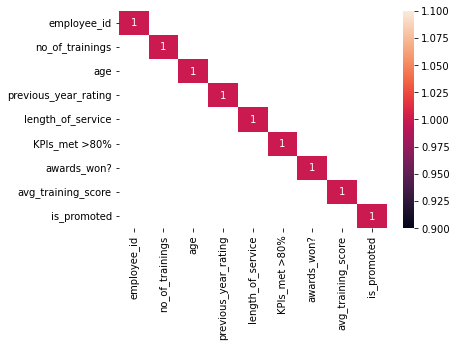

In [192]:
sns.heatmap(vcorr[(vcorr>0.85) | (vcorr<-0.85)],annot=True)
plt.show()

We can see that no two independent variables are highly correlated with each other.

In [193]:
#Creating a backup of file

In [194]:
df_hr1=df_hr.copy(deep=True)

In [36]:
df_hr1=df_hr.drop(['no_of_trainings','age','length_of_service'],axis=1)

## 4.Dummy Encoding the Categorical Variables

In [195]:
#Separating the train and test set

In [196]:
df_train=df_hr1.loc[df_hr['source']=='train']
df_test=df_hr1.loc[df_hr['source']=='test']

In [197]:
df_train1=df_train.drop(['employee_id','source'],axis=1)
df_test1=df_test.drop(['source','is_promoted','employee_id'],axis=1)

In [198]:
df_train1.shape

(54808, 16)

In [199]:
df_test1.shape

(23490, 15)

In [200]:
df_train1_dummy=pd.get_dummies(df_train1,drop_first=True)
df_train1_dummy.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings_cat_medium,no_of_trainings_cat_high,age_cat_middle,age_cat_senior,length_of_service_cat_medium,length_of_service_cat_long
0,1,35,5.0,8,1,0,49,0,0,0,...,1,0,0,1,0,0,1,0,1,0
1,1,30,5.0,4,0,0,60,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2,39,1.0,10,0,0,50,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [201]:
df_test1_dummy=pd.get_dummies(df_test1,drop_first=True)
df_test1_dummy.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings_cat_medium,no_of_trainings_cat_high,age_cat_middle,age_cat_senior,length_of_service_cat_medium,length_of_service_cat_long
54808,1,24,4.0,1,1,0,77,0,0,0,...,0,1,0,1,0,0,0,0,0,0
54809,1,31,3.0,5,0,0,51,0,1,0,...,0,0,0,0,0,0,1,0,0,0
54810,1,31,1.0,4,0,0,47,0,0,0,...,0,1,0,0,0,0,1,0,0,0
54811,3,31,2.0,9,0,0,65,0,0,0,...,0,0,0,0,1,0,1,0,1,0
54812,1,30,4.0,7,0,0,61,1,0,0,...,0,1,0,1,0,0,0,0,0,0


## 5.Splitting into X_train and y_train

In [203]:
X_train=df_train1_dummy.drop('is_promoted',axis=1)
X_train.shape

(54808, 59)

In [204]:
y_train=df_train1_dummy['is_promoted']
y_train.shape

(54808,)

In [205]:
X_test=df_test1_dummy
X_test.shape

(23490, 59)

In [207]:
#Checking for value counts in y_train

In [208]:
y_train.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

We can see that it is an unbalanced class. So we need to balance it using SMOTE

In [209]:
oversample=SMOTE()

In [210]:
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [211]:
X_train.shape

(100280, 59)

In [212]:
y_train.shape

(100280,)

## 6.Scaling the data

In [213]:
#Standard Scaling

In [238]:
rs=RobustScaler()

In [239]:
X_train_scaled=rs.fit_transform(X_train)
X_test_scaled=rs.transform(X_test)

## 7.Model Building

### 1.Logistic Regression

In [240]:
lr=LogisticRegression()

In [241]:
lr.fit(X_train_scaled,y_train)

C:\Users\Sushree Jena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [242]:
pred_train_values=lr.predict(X_train_scaled)
pred_test_values=lr.predict(X_test_scaled)

In [243]:
print('The training accuracy score is: ',accuracy_score(y_train,pred_train_values))

The training accuracy score is:  0.8785899481451934


In [244]:
print('The training F1 score is: ',f1_score(y_train,pred_train_values))

The training F1 score is:  0.8735524744248845


In [245]:
submit_lr=pd.DataFrame({'employee_id':df_test['employee_id'],'is_promoted':pred_test_values})

In [246]:
submit_lr.to_csv('hr_analytics.submit_lr.csv',index=False)

### 2.Decision Tree

In [254]:
dt=DecisionTreeClassifier()

In [255]:
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [256]:
pred_train_values=dt.predict(X_train_scaled)
pred_test_values=dt.predict(X_test_scaled)

In [257]:
print('The training accuracy score is: ',accuracy_score(y_train,pred_train_values))

The training accuracy score is:  0.9995412844036697


In [258]:
print('The training F1 score is: ',f1_score(y_train,pred_train_values))

The training F1 score is:  0.9995412661055487


In [259]:
submit_dt=pd.DataFrame({'employee_id':df_test['employee_id'],'is_promoted':pred_test_values})

In [260]:
submit_dt.to_csv('hr_analytics.submit_dt.csv',index=False)

## 3.Random Forest

In [229]:
rf=RandomForestClassifier()

In [230]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [231]:
pred_train_values=dt.predict(X_train_scaled)
pred_test_values=dt.predict(X_test_scaled)

In [232]:
print('The training accuracy score is: ',accuracy_score(y_train,pred_train_values))

The training accuracy score is:  0.9995412844036697


In [233]:
print('The training F1 score is: ',f1_score(y_train,pred_train_values))

The training F1 score is:  0.9995412661055487


In [234]:
submit_rf=pd.DataFrame({'employee_id':df_test['employee_id'],'is_promoted':pred_test_values})

In [235]:
submit_rf.to_csv('hr_analytics.submit_rf.csv',index=False)

## 4.GridSearch using RF as base model

In [82]:
tuned_parameters={'n_estimators':[85,100],'min_samples_split':[15,20],'max_depth':[8,10]}

In [83]:
gs=GridSearchCV(estimator=rf,param_grid=tuned_parameters,cv=5)
gs.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10], 'min_samples_split': [15, 20],
                         'n_estimators': [85, 100]})

In [84]:
print('The best parameters are: ',gs.best_params_)

The best parameters are:  {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 85}


In [85]:
#Rebuilding RF model using these parameters

In [86]:
rf1=RandomForestClassifier(max_depth=10,min_samples_split=15,n_estimators=85)

In [87]:
rf1.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=15, n_estimators=85)

In [88]:
pred_train_values=rf1.predict(X_train_scaled)
pred_test_values=rf1.predict(X_test_scaled)

In [89]:
print('The training accuracy score is: ',accuracy_score(y_train,pred_train_values))

The training accuracy score is:  0.8083566015157558


In [90]:
print('The training F1 score is: ',f1_score(y_train,pred_train_values))

The training F1 score is:  0.8195594614387922


In [91]:
submit_rf_with_GridSearchCV=pd.DataFrame({'employee_id':df_test['employee_id'],'is_promoted':pred_test_values})

In [92]:
submit_rf_with_GridSearchCV.to_csv('hr_analytics.submit_rf_with_GridSearchCV.csv',index=False)

## 5.XGBClassifier

In [247]:
xgb=XGBClassifier()

In [248]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [249]:
pred_train_values=xgb.predict(X_train_scaled)
pred_test_values=xgb.predict(X_test_scaled)

In [250]:
print('The training accuracy score is: ',accuracy_score(y_train,pred_train_values))

The training accuracy score is:  0.9490925408855205


In [251]:
print('The training F1 score is: ',f1_score(y_train,pred_train_values))

The training F1 score is:  0.9483336200876455


In [252]:
submit_xgb=pd.DataFrame({'employee_id':df_test['employee_id'],'is_promoted':pred_test_values})

In [253]:
submit_xgb.to_csv('hr_analytics.submit_xgb.csv',index=False)

## 6.KNN Classifier

In [64]:
k_values=range(3,21)

In [65]:
train_accuracy={}

In [66]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    pred_train_values=knn.predict(X_train_scaled)
    pred_test_values=knn.predict(X_test_scaled)
    train_accuracy[k]=accuracy_score(y_train,pred_train_values)

In [67]:
max(train_accuracy.values())

0.9430594335859593

In [68]:
max(train_accuracy,key=train_accuracy.get)

3

In [69]:
#building the model with 3 neighbors

In [70]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
pred_train_values=knn.predict(X_train_scaled)
pred_test_values=knn.predict(X_test_scaled)

In [71]:
print('The training accuracy score is: ',accuracy_score(y_train,pred_train_values))

The training accuracy score is:  0.9430594335859593


In [72]:
print('The training F1 score is: ',f1_score(y_train,pred_train_values))

The training F1 score is:  0.9421068640373111


In [73]:
submit_knn=pd.DataFrame({'employee_id':df_test['employee_id'],'is_promoted':pred_test_values})

In [74]:
submit_knn.to_csv('hr_analytics.submit_knn.csv',index=False)

## 7.Naive Bayes

In [155]:
gnb=GaussianNB()

In [156]:
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [157]:
pred_train_values=gnb.predict(X_train_scaled)
pred_test_values=gnb.predict(X_test_scaled)

In [158]:
print('The training accuracy score is: ',accuracy_score(y_train,pred_train_values))

The training accuracy score is:  0.6928599920223375


In [159]:
print('The training F1 score is: ',f1_score(y_train,pred_train_values))

The training F1 score is:  0.747797320755953


In [160]:
submit_gnb=pd.DataFrame({'employee_id':df_test['employee_id'],'is_promoted':pred_test_values})

In [161]:
submit_gnb.to_csv('hr_analytics.submit_gnb.csv',index=False)